In [3]:
# 1. Load the data contained in the CSV file in Python.


path = "./Downloads/birth_weight_2018_sample.csv"
data = pd.read_csv(path, decimal=";")   
print(data)

       birth_weight            educ_mother           pre_care sex  \
0              3280            High School    First trimester   F   
1              2700            High School  No prenatal visit   F   
2              2945  Less than High School    First trimester   M   
3               285       College Graduate    First trimester   F   
4              3884       College Graduate    First trimester   M   
...             ...                    ...                ...  ..   
19995          4635       College Graduate    First trimester   M   
19996          3850       College Graduate    First trimester   F   
19997          2750       College Graduate    First trimester   M   
19998          2495  Less than High School    First trimester   F   
19999          3410  Less than High School    Second semester   M   

      marital_status_mother race_mother  age_mother  smoke_mother  \
0                   Married   Non white          43  Do not smoke   
1                 Unmarried   Non

In [5]:
data.keys()

Index(['birth_weight', 'educ_mother', 'pre_care', 'sex',
       'marital_status_mother', 'race_mother', 'age_mother', 'smoke_mother',
       'no_cigarettes_day', 'weight_gain_mother'],
      dtype='object')

In [6]:
# 2.1 Compute some basic descriptive statistics for each variable: for quantitative variables: mean, standard deviation, first and third quartiles as well

print(data.describe())

       birth_weight    age_mother  no_cigarettes_day  weight_gain_mother
count  20000.000000  20000.000000       20000.000000        20000.000000
mean    3267.828650     29.086900           1.140250           29.398400
std      571.591187      5.773977           4.827406           15.223895
min      230.000000     14.000000           0.000000            0.000000
25%     2975.000000     25.000000           0.000000           20.000000
50%     3305.000000     29.000000           0.000000           29.000000
75%     3629.000000     33.000000           0.000000           38.000000
max     4990.000000     50.000000          98.000000           98.000000


In [8]:
# 2.2 for qualitative variables: proportion in each category.

pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [10]:
import researchpy as rp

In [11]:
rp.summary_cat(data['educ_mother'])

,Variable,Outcome,Count,Percent
0,educ_mother,College Graduate,8552,42.76
1,,High School,5081,25.40
2,,Some College,3983,19.92
3,,Less than High School,2384,11.92


In [12]:
rp.summary_cat(data['educ_mother'])

,Variable,Outcome,Count,Percent
0,educ_mother,College Graduate,8552,42.76
1,,High School,5081,25.40
2,,Some College,3983,19.92
3,,Less than High School,2384,11.92


In [13]:
rp.summary_cat(data['sex'])

,Variable,Outcome,Count,Percent
0,sex,M,10076,50.38
1,,F,9924,49.62


In [14]:
rp.summary_cat(data['marital_status_mother'])

,Variable,Outcome,Count,Percent
0,marital_status_mother,Married,10522,52.61
1,,Unmarried,9478,47.39


In [15]:
rp.summary_cat(data['race_mother'])

,Variable,Outcome,Count,Percent
0,race_mother,Non white,20000,100.0


In [16]:
rp.summary_cat(data['smoke_mother'])

,Variable,Outcome,Count,Percent
0,smoke_mother,Do not smoke,18293,91.46
1,,Smokes,1707,8.54


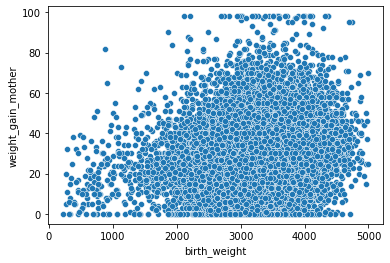

In [17]:
#3. Create a scatterplot with the observed values for the weight of babies at birth.

import seaborn as sns
sns.scatterplot(x="birth_weight", y="weight_gain_mother", data=data);

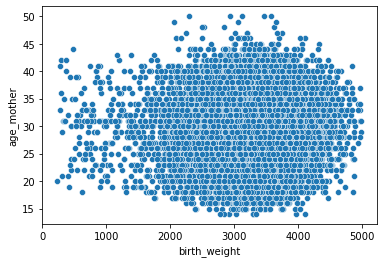

In [18]:
import seaborn as sns
sns.scatterplot(x="birth_weight", y="age_mother", data=data);

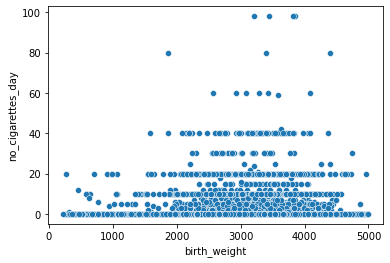

In [19]:
import seaborn as sns
sns.scatterplot(x="birth_weight", y="no_cigarettes_day", data=data);

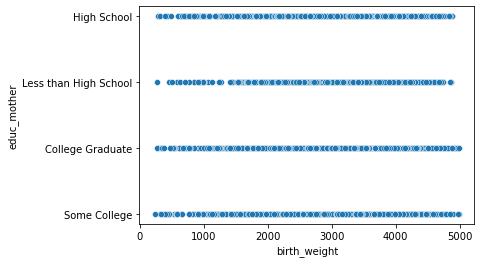

In [20]:
import seaborn as sns
sns.scatterplot(x="birth_weight", y="educ_mother", data=data);

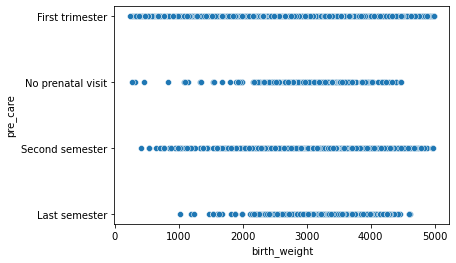

In [21]:
import seaborn as sns
sns.scatterplot(x="birth_weight", y="pre_care", data=data);

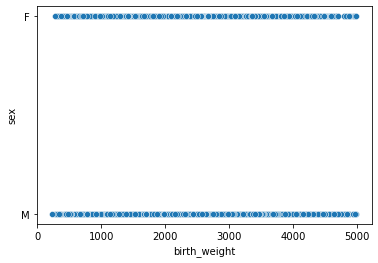

In [22]:
import seaborn as sns
sns.scatterplot(x="birth_weight", y="sex", data=data);

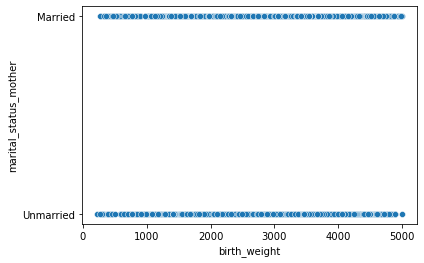

In [23]:
import seaborn as sns
sns.scatterplot(x="birth_weight", y="marital_status_mother", data=data);

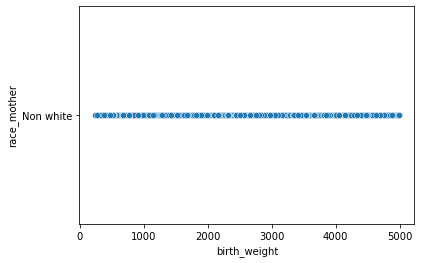

In [24]:
import seaborn as sns
sns.scatterplot(x="birth_weight", y="race_mother", data=data);

In [1]:
# 4. Display a boxplot of all the numerical variables (both the target y and the explanatory variables x.

import seaborn as sns
 

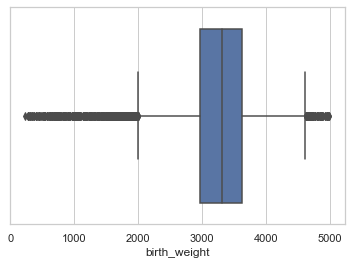

In [6]:
sns.set_theme(style="whitegrid")


ax = sns.boxplot(x=data["birth_weight"])

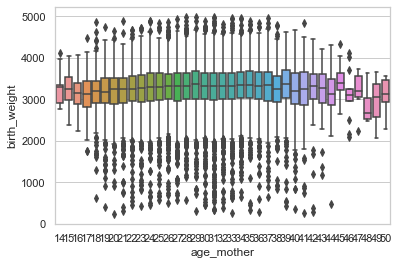

In [7]:
ax = sns.boxplot(x="age_mother", y="birth_weight", data=data)

In [10]:
# 5. Compute de correlations of the weight of babies at birth with other numerical variables.

from scipy import stats
stats.pearsonr(data['birth_weight'], data['age_mother'])

(0.03948759204457551, 2.3206736915718253e-08)

In [11]:
from scipy import stats
stats.pearsonr(data['birth_weight'], data['weight_gain_mother'])

(0.16350200717255123, 7.40115748979443e-120)

In [12]:
from scipy import stats
stats.pearsonr(data['birth_weight'], data['age_mother'])

(0.03948759204457551, 2.3206736915718253e-08)

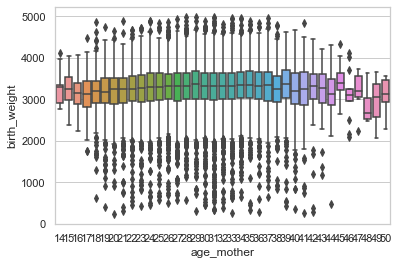

In [7]:
# 6. Display a scatter plot of the weight of babies at birth depending on the age of the mother.

ax = sns.boxplot(x="age_mother", y="birth_weight", data=data)

In [24]:
# 7. Compute some descriptive statistics (mean, standard deviation, first and third quartiles, median, min, max) for the weight of babies at birth depending on whether the mother was a smoker or not.

smoke =  data.groupby('smoke_mother')['smoke_mother'].count()
print(smoke)

smoke_mother
Do not smoke    18293
Smokes           1707
Name: smoke_mother, dtype: int64


In [30]:
data.groupby(['smoke_mother'])['birth_weight'].describe()

,count,mean,std,min,25%,50%,75%,max
smoke_mother,,,,,,,,
Do not smoke,18293.0,3279.705789,566.391357,230.0,2980.0,3317.0,3630.0,4990.0
Smokes,1707.0,3140.547745,610.435773,270.0,2802.0,3200.0,3517.0,4960.0


In [27]:
# 8 Fit a linear regression model of the weight of babies at birth depending on the age of the mother.


X = np.c_[data["age_mother"]]
y = np.c_[data["birth_weight"]]

In [28]:
from sklearn.linear_model import LinearRegression
model = sklearn.linear_model.LinearRegression()

In [29]:
model.fit(X,y)

LinearRegression()

In [30]:
print("R2", model.score(X,y))

R2 0.0015592699254788345


In [31]:
print("Pente", model.coef_)

Pente [[3.90904881]]


In [32]:
print("Constante", model.intercept_)

Constante [3154.12653811]


In [35]:
# 9 Fit another linear regression model of the weight of babies at birth depending on whether the mother smoked or not.

import pandas as pd

datas = pd.DataFrame({'smoke_mother': ['Smokes', 'Do_not_smoke']})
print(pd.get_dummies(datas))

   smoke_mother_Do_not_smoke  smoke_mother_Smokes
0                          0                    1
1                          1                    0


In [37]:
X = data[['smoke_mother']]
X = pd.get_dummies(data=X, drop_first=True)

In [38]:
y = np.c_[data["birth_weight"]]

In [39]:
from sklearn.linear_model import LinearRegression
model = sklearn.linear_model.LinearRegression()

In [40]:
model.fit(X,y)

LinearRegression()

In [41]:
print("R2", model.score(X,y))

R2 0.004627279854645394


In [42]:
print("Pente", model.coef_)

Pente [[-139.15804452]]


In [43]:
print("Constante", model.intercept_)

Constante [3279.7057891]


In [20]:
# 10 Fit a third linear regression model of the weight of babies at birth depending on both the age of the mother and whether she smoked or not.

import statsmodels.api as sm           
import statsmodels.formula.api as smf



In [22]:
x1 = data["age_mother"]                             
x2 = data["smoke_mother"]                             
y = data["birth_weight"]  

In [23]:
mod = smf.ols('y ~ x1 + x2', data=data).fit()

In [24]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     58.22
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           6.17e-26
Time:                        18:00:01   Log-Likelihood:            -1.5529e+05
No. Observations:               20000   AIC:                         3.106e+05
Df Residuals:                   19997   BIC:                         3.106e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3180.7608     20.900    152.191   

In [24]:
from sklearn import linear_model
import statsmodels.api as sm

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [5]:
# 11. Estimate the same three relationships with a quantile regression model instead of a linear one : consider different levels for the quantiles: .1, .25, .5, .75, .9.

mod = smf.quantreg("birth_weight ~ age_mother", data)
res = mod.fit(q=0.1)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:           -2.291e-12
Model:                       QuantReg   Bandwidth:                       71.17
Method:                 Least Squares   Sparsity:                        4122.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:02   Df Residuals:                    19998
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2600.0000     47.816     54.375      0.000    2506.276    2693.724
age_mother -2.759e-08      1.617  -1.71e-08      1.000      -3.169       3.169


In [6]:
mod = smf.quantreg("birth_weight ~ age_mother", data)
res = mod.fit(q=0.25)
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:            0.0005147
Model:                       QuantReg   Bandwidth:                       76.26
Method:                 Least Squares   Sparsity:                        1658.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:05   Df Residuals:                    19998
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2880.5556     26.899    107.089      0.000    2827.832    2933.279
age_mother     3.1111      0.908      3.426      0.001       1.331       4.891


In [7]:
mod = smf.quantreg("birth_weight ~ age_mother", data)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.001424
Model:                       QuantReg   Bandwidth:                       87.62
Method:                 Least Squares   Sparsity:                        1191.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:07   Df Residuals:                    19998
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3170.0000     21.635    146.519      0.000    3127.593    3212.407
age_mother     4.7143      0.730      6.462      0.000       3.284       6.144


In [8]:
mod = smf.quantreg("birth_weight ~ age_mother", data)
res = mod.fit(q=0.75)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.002581
Model:                       QuantReg   Bandwidth:                       76.12
Method:                 Least Squares   Sparsity:                        1530.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:08   Df Residuals:                    19998
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3446.4286     23.370    147.472      0.000    3400.621    3492.236
age_mother     6.1429      0.787      7.805      0.000       4.600       7.686


In [9]:
mod = smf.quantreg("birth_weight ~ age_mother", data)
res = mod.fit(q=0.90)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.002621
Model:                       QuantReg   Bandwidth:                       70.80
Method:                 Least Squares   Sparsity:                        2756.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:12   Df Residuals:                    19998
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3726.6667     28.041    132.900      0.000    3671.704    3781.630
age_mother     6.6667      0.943      7.070      0.000       4.818       8.515


In [10]:
mod = smf.quantreg("birth_weight ~ smoke_mother", data)
res = mod.fit(q=0.10)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.005055
Model:                       QuantReg   Bandwidth:                       71.27
Method:                 Least Squares   Sparsity:                        4037.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:13   Df Residuals:                    19998
                                        Df Model:                            1
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2620.0000      8.955    292.563      0.000    2602.447    2637.553
smoke_mother[T.Smokes]  -210.0000     30.598     -6.863      0.000    -269.974    -150.026


In [11]:
mod = smf.quantreg("birth_weight ~ age_mother + smoke_mother", data)
res = mod.fit(q=0.25)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.004439
Model:                       QuantReg   Bandwidth:                       76.29
Method:                 Least Squares   Sparsity:                        1600.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:16   Df Residuals:                    19997
                                        Df Model:                            2
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2912.5000     26.331    110.610      0.000    2860.889    2964.111
smoke_mother[T.Smokes]  -178.0000     17.656    -10.082      0.000    -212.607    -143.393
age_mother                 2.5000      0.882      2.833      0.005       0.770     

In [12]:
mod = smf.quantreg("birth_weight ~ age_mother + smoke_mother", data)
res = mod.fit(q=0.50)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.003111
Model:                       QuantReg   Bandwidth:                       87.47
Method:                 Least Squares   Sparsity:                        1199.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:16   Df Residuals:                    19997
                                        Df Model:                            2
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3196.3636     21.985    145.387      0.000    3153.271    3239.456
smoke_mother[T.Smokes]  -112.2727     15.224     -7.375      0.000    -142.113     -82.433
age_mother                 4.0909      0.737      5.553      0.000       2.647     

In [13]:
mod = smf.quantreg("birth_weight ~ age_mother + smoke_mother", data)
res = mod.fit(q=0.75)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.004087
Model:                       QuantReg   Bandwidth:                       76.04
Method:                 Least Squares   Sparsity:                        1525.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:18   Df Residuals:                    19997
                                        Df Model:                            2
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3467.0000     23.457    147.800      0.000    3421.022    3512.978
smoke_mother[T.Smokes]  -100.3333     16.756     -5.988      0.000    -133.176     -67.490
age_mother                 5.6667      0.785      7.216      0.000       4.127     

In [14]:
mod = smf.quantreg("birth_weight ~ age_mother + smoke_mother", data)
res = mod.fit(q=0.90)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.003619
Model:                       QuantReg   Bandwidth:                       70.95
Method:                 Least Squares   Sparsity:                        2714.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:21   Df Residuals:                    19997
                                        Df Model:                            2
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3752.0000     27.950    134.238      0.000    3697.215    3806.785
smoke_mother[T.Smokes]   -89.0000     20.679     -4.304      0.000    -129.532     -48.468
age_mother                 6.0000      0.934      6.424      0.000       4.169     

In [15]:
mod = smf.quantreg("birth_weight ~ age_mother + smoke_mother", data)
res = mod.fit(q=0.10)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.005114
Model:                       QuantReg   Bandwidth:                       71.59
Method:                 Least Squares   Sparsity:                        3970.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:23   Df Residuals:                    19997
                                        Df Model:                            2
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2662.8571     46.484     57.286      0.000    2571.745    2753.969
smoke_mother[T.Smokes]  -222.8571     30.363     -7.340      0.000    -282.371    -163.343
age_mother                -1.4286      1.559     -0.917      0.359      -4.484     

In [16]:
mod = smf.quantreg("birth_weight ~ age_mother + smoke_mother", data)
res = mod.fit(q=0.25)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.004439
Model:                       QuantReg   Bandwidth:                       76.29
Method:                 Least Squares   Sparsity:                        1600.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:24   Df Residuals:                    19997
                                        Df Model:                            2
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2912.5000     26.331    110.610      0.000    2860.889    2964.111
smoke_mother[T.Smokes]  -178.0000     17.656    -10.082      0.000    -212.607    -143.393
age_mother                 2.5000      0.882      2.833      0.005       0.770     

In [17]:
mod = smf.quantreg("birth_weight ~ age_mother + smoke_mother", data)
res = mod.fit(q=0.50)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.003111
Model:                       QuantReg   Bandwidth:                       87.47
Method:                 Least Squares   Sparsity:                        1199.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:26   Df Residuals:                    19997
                                        Df Model:                            2
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3196.3636     21.985    145.387      0.000    3153.271    3239.456
smoke_mother[T.Smokes]  -112.2727     15.224     -7.375      0.000    -142.113     -82.433
age_mother                 4.0909      0.737      5.553      0.000       2.647     

In [18]:
mod = smf.quantreg("birth_weight ~ age_mother + smoke_mother", data)
res = mod.fit(q=0.75)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.004087
Model:                       QuantReg   Bandwidth:                       76.04
Method:                 Least Squares   Sparsity:                        1525.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:27   Df Residuals:                    19997
                                        Df Model:                            2
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3467.0000     23.457    147.800      0.000    3421.022    3512.978
smoke_mother[T.Smokes]  -100.3333     16.756     -5.988      0.000    -133.176     -67.490
age_mother                 5.6667      0.785      7.216      0.000       4.127     

In [19]:
mod = smf.quantreg("birth_weight ~ age_mother + smoke_mother", data)
res = mod.fit(q=0.90)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:           birth_weight   Pseudo R-squared:             0.003619
Model:                       QuantReg   Bandwidth:                       70.95
Method:                 Least Squares   Sparsity:                        2714.
Date:                Wed, 22 Sep 2021   No. Observations:                20000
Time:                        16:51:30   Df Residuals:                    19997
                                        Df Model:                            2
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3752.0000     27.950    134.238      0.000    3697.215    3806.785
smoke_mother[T.Smokes]   -89.0000     20.679     -4.304      0.000    -129.532     -48.468
age_mother                 6.0000      0.934      6.424      0.000       4.169     

In [ ]:
# 12. For each of the three different models, create a plot that shows for each predictor. 

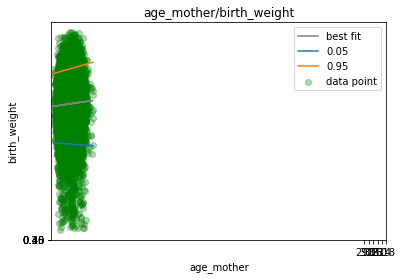

In [85]:
model = smf.quantreg('birth_weight ~ age_mother',data)
quantiles = [0.05,0.95]
fits = [model.fit(q=q) for q in quantiles]
figure,axes = plt.subplots()
x = data['age_mother']
y = data['birth_weight']
axes.scatter(x,data['birth_weight'],c='green',alpha=0.3,label='data point')
fit = np.polyfit(x, y, deg=1)
axes.plot(x, fit[0] * x + fit[1], color='grey',label='best fit')
_x = np.linspace(x.min(),x.max())
for index, quantile in enumerate(quantiles):
    _y = fits[index].params['age_mother'] * _x + fits[index].params['Intercept']
    axes.plot(_x, _y, label=quantile)

title = 'age_mother/birth_weight'
plt.title(title)
axes.legend()
axes.set_xticks(np.arange(298,320,4))
axes.set_yticks(np.arange(0.25,0.5,.05))
axes.set_xlabel('age_mother')
axes.set_ylabel('birth_weight');